In [3]:
import pandas as pd
import numpy as np
import csv
import pickle
from collections import Counter
import matplotlib.pyplot as plt
import powerlaw,math
import os
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [4]:
files_csv = ['chemistry_0119.csv', 'physics_0119.csv', 'neuro_0119.csv']

In [5]:
# chemistry:[0.35]
# physics:[1970_1980:0.3,0.3]
# neuro:[0.25]

chemistry_0119.csv
physics_0119.csv
neuro_0119.csv


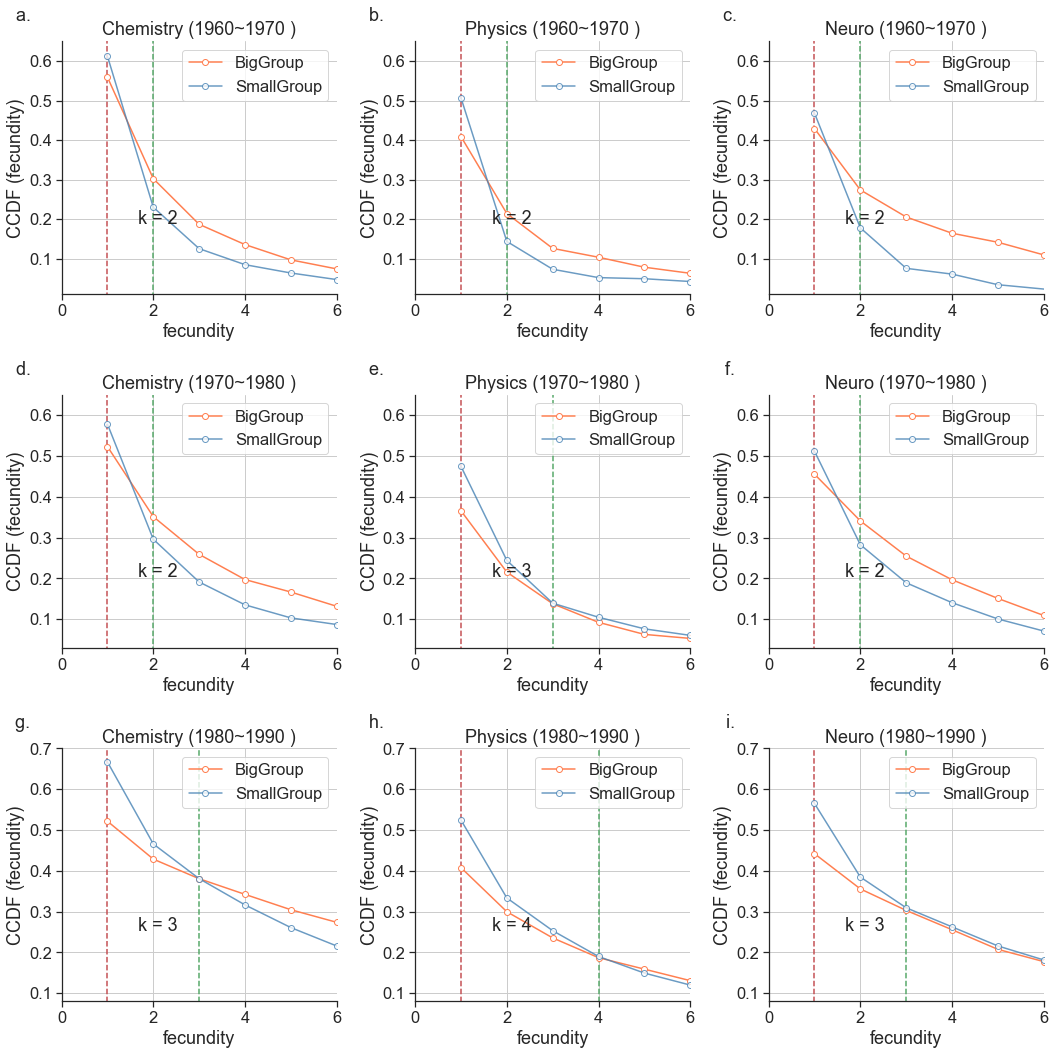

In [16]:
sns.set(style='ticks', font_scale=1.5, font='Arial')
# start = 1985
# end = start + 10
start_end = [[1960,1970],[1970,1980],[1980,1990]]
l_index = [' a. ',' b. ',' c. ',' d. ',' e. ',' f. ',' g. ',' h. ',' i. ',' j. ',' k. ',' l. ']
Titles = ['Chemistry','Physics','Neuro']
#选取不同层次的人比较
percent = 0
percent1 = 1
fig = plt.figure(figsize=(15,15),tight_layout=1)

for ii in range(len(files_csv)):

   
    k = files_csv[ii]
    print(k)
    neuro = pd.read_csv(k)
    interval = 1
    for se in start_end:
        start = se[0]
        end = se[1]
        
        if ii==0:
            pt = 0.35
            pt1 = 0.35
        elif ii==2:
            pt = 0.25
            pt1 = 0.25
        else:
            if start==1970:
                pt = 0.3
                pt1 = 0.3
            else:
                pt = 0.25
                pt1 = 0.25

    
        neuro_19602000 = neuro[(neuro['StopYear']>=start)&(neuro['StopYear']<=end)]
        
        #根据当时时代的基数重新划分bigorsmall
        mentees_groupsize = np.array(neuro_19602000[['MenteeID','NumOfMenteesOfTheMentor10']])
        mm = sorted(mentees_groupsize,key = lambda x:x[1],reverse=1)

        big = mm[:round(len(mm)*pt)]
        bigGroup = list(set([tt[0] for tt in big]))
        small = mm[-round(len(mm)*pt1):]
        smallGroup = list(set([tt[0] for tt in small]))

        n_bigGroup = neuro_19602000['NumOfMenteesOfTheMenteeIn20'][neuro_19602000.MenteeID.isin(bigGroup)]
        n_smallGroup = neuro_19602000['NumOfMenteesOfTheMenteeIn20'][neuro_19602000.MenteeID.isin(smallGroup)]       
        ax = fig.add_subplot(3,3,ii+interval) 
        

        ax.text(-0.14, 1.1,l_index[ii+interval-1],ha='center', va='center', transform=ax.transAxes)
        interval+=3
        X0,Y2,x0,y2 = ccdf_xy(n_bigGroup,n_smallGroup)  # ccdf of overall mentee
   
        #画广义生存率的阈值
        th = []
        for tt in range(100):
            try:
                tp0 = Y2[tt]
                tp1 = y2[tt]
                tp = tp0-tp1
                if tp>-0.01:
                    th.append(tt)
            except:
                th = th
        try:
            thre = th[0]
            ax.plot([thre+1,thre+1],[min(y2),1],ls='--',c='g')
                #标记
            if ii>0:
#                 print('ii')
                ax.text(0.35, 0.3,'k = '+str(thre+1),ha='center', va='center', transform=ax.transAxes)
            else:
                 ax.text(0.35, 0.3,'k = '+str(thre+1),ha='center', va='center', transform=ax.transAxes)
        except:
            a = 'nt'
    
        #画生存率比较
        ax.plot([1,1],[min(y2),1],ls='--',c='r')
        X0 = np.array(X0)
        x0 = np.array(x0)
        ax.plot(X0+1,Y2,label='BigGroup',color='coral',marker='o',ls='-',markerfacecolor='white') 
        ax.plot(x0+1,y2,label='SmallGroup',color='steelblue',marker='o',ls='-',markerfacecolor='white',alpha=0.8)
        ax.set_xlabel('fecundity')
        ax.set_ylabel('CCDF (fecundity)')

#         if ii==1:
#             ax.set_ylim([0.03,1])
#         elif ii==0:
#             ax.set_ylim([0.1,1])
#         else:
#             ax.set_ylim([0.08,1])
            
        if start==1960:
            ax.set_ylim([0.01,0.65])
            ax.set_xlim([0,6])
        elif start==1970:
            ax.set_ylim([0.03,0.65])
            ax.set_xlim([0,6])
        else:
            ax.set_ylim([0.08,0.7])
            ax.set_xlim([0,6])
            
#         ax.set_xlim([-1,10])
    #     ax.set_title('Overall mentee')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        legend = ax.legend(loc='upper right')
    #     frame = legend.get_frame() 
    #     frame.set_alpha(1) 
    #     frame.set_facecolor('none') # 设置图例legend背景透明
    #     legend.get_frame().set_linewidth(0.0)
        ax.grid(True,ls="-")
        ax.set_title(Titles[ii]+' ('+str(start)+'~'+str(end)+' )')
fig.savefig('k_evolution0802.pdf')

In [7]:
def ccdf_xy(data0,data1):
    TP0 = dict(Counter(data0))
#     print(TP0)
    TP1 = sorted(TP0.items(),key = lambda i:i[0],reverse=0)
#     print(TP1)
    
        #SmallGroup
    tp0 = dict(Counter(data1))
#     print(tp0)
    tp1 = sorted(tp0.items(),key = lambda i:i[0],reverse=0)
#     print(tp1)
    
    X0 = [k[0] for k in TP1]
    Y0 = np.array([k[1] for k in TP1])
    Y1 = []
    temp = 0
    for k in Y0:
        temp+=k
        Y1.append(temp)
    Y1 = np.array(Y1)
    Y0 = Y0/len(data0)
    Y1 = Y1/len(data0)
    Y2 = 1-Y1
    
    x0 = [k[0] for k in tp1]
    y0 = np.array([k[1] for k in tp1])
    y1 = []
    temp = 0
    for k in y0:
        temp+=k
        y1.append(temp)
    y1 = np.array(y1)
    
    y0 = y0/len(data1)
    y1 = y1/len(data1)
    y2 = 1-y1
    
    return X0,Y2,x0,y2